In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
titanic_train = pd.read_csv("C:\\Users\\user\\Documents\\Study\\titanic\\train.csv", encoding="UTF-8")

In [4]:
titanic_test = pd.read_csv("C:\\Users\\user\\Documents\\Study\\titanic\\test.csv", encoding="UTF-8")

In [5]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_train.describe(include = 'all') # 수치형 변수 외 모든 변수 나타내기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Carter, Mr. William Ernest",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
pd.isnull(titanic_train).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
pd.isnull(titanic_test).sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##### EDA #####

In [12]:
# 피벗테이블 생성
def pivot(feature) :
    pivot_table = titanic_train.pivot_table(index = [feature], values = "Survived")
    pivot_table.plot.bar()
    plt.show()

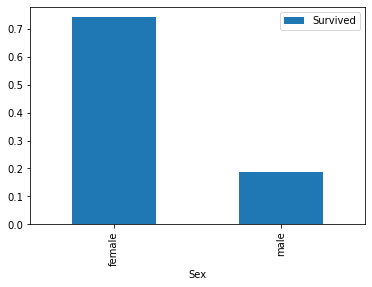

In [13]:
pivot("Sex") # 성별에 따른 생존여부

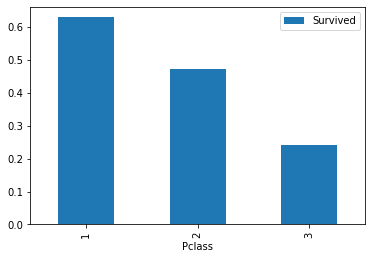

In [14]:
pivot("Pclass") # 좌석 등급에 따른 생존여부

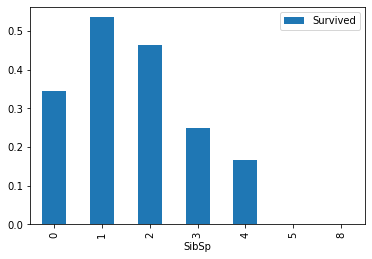

In [15]:
pivot("SibSp")

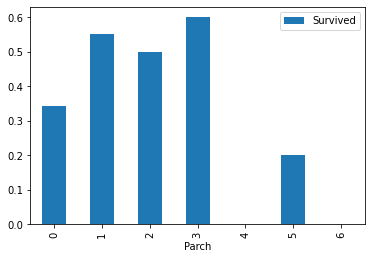

In [16]:
pivot("Parch")

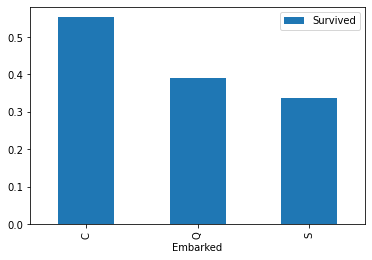

In [17]:
pivot("Embarked")

<AxesSubplot:xlabel='Age'>

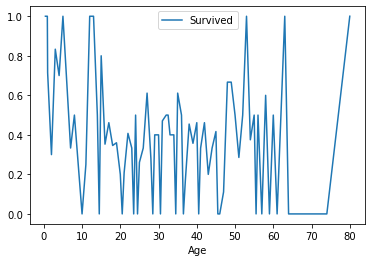

In [18]:
age_pivot = titanic_train.pivot_table(index=["Age"], values = "Survived")
age_pivot.plot.line() # 나이에 따른 생존여부 평균

##### 데이터 전처리 #####

In [19]:
pd.isnull(titanic_train).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
# 필요없는 변수 제거
titanic_train = titanic_train.drop(["PassengerId", "Ticket", "Cabin"], axis = 1)
titanic_test = titanic_test.drop(["PassengerId", "Ticket", "Cabin"], axis = 1) 

In [21]:
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [22]:
# 성별 변수 매핑
sex_convert = {"male" : 0, "female" : 1}
titanic_train["Sex"] = titanic_train["Sex"].map(sex_convert)
titanic_test["Sex"] = titanic_test["Sex"].map(sex_convert)

In [23]:
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [24]:
# 나이 변수 결측치 처리
pd.isnull(titanic_train["Age"]).sum()

177

In [25]:
# 빈도수 분석을 이용한 피벗테이블 통해 결측치 처리
titanic_train.corr() # Pclass 선택 / 생존에 관련이 높은 Sex 선택

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


In [26]:
age_pivot = titanic_train.pivot_table(values = "Age", index = ["Pclass", "Sex"], aggfunc = "mean")
age_pivot

Age
Pclass Sex           
1      0    41.281386
       1    34.611765
2      0    30.740707
       1    28.722973
3      0    26.507589
       1    21.750000

In [27]:
def fill_age(row) :
    if pd.isnull(row["Age"]) :
        return age_pivot.loc[row["Pclass"], row["Sex"]]
    else :
        return row["Age"]

In [28]:
titanic_train["Age"] = titanic_train.apply(fill_age, axis=1).astype("int64")

In [29]:
pd.isnull(titanic_train["Age"]).sum()

0

In [30]:
# test 데이터의 Age 변수
titanic_test.corr() # Pclass / Sex 선택

,Pclass,Sex,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.108615,-0.492143,0.001087,0.018721,-0.577147
Sex,-0.108615,1.000000,-0.000013,0.099943,0.159120,0.191514
Age,-0.492143,-0.000013,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.001087,0.099943,-0.091587,1.000000,0.306895,0.171539
Parch,0.018721,0.159120,-0.061249,0.306895,1.000000,0.230046
Fare,-0.577147,0.191514,0.337932,0.171539,0.230046,1.000000


In [31]:
pivot_age2 = titanic_test.pivot_table(values = "Age", index = ["Pclass", "Sex"], aggfunc = "mean")
pivot_age2

Age
Pclass Sex           
1      0    40.520000
       1    41.333333
2      0    30.940678
       1    24.376552
3      0    24.525104
       1    23.073400

In [32]:
def fill_age2(row) :
    if pd.isnull(row["Age"]) :
        return pivot_age2.loc[row["Pclass"], row["Sex"]]
    else :
        return row["Age"]

In [33]:
titanic_test["Age"] = titanic_test.apply(fill_age2, axis=1).astype("int64")
pd.isnull(titanic_test["Age"]).sum()

0

In [34]:
# Name 에서 필요 단어만 추출
def split_name(name) :
    return name.split(",")[1].split(".")[0].strip()

In [35]:
titanic_train["Name"] = titanic_train["Name"].apply(split_name)
titanic_test["Name"] = titanic_test["Name"].apply(split_name)

In [36]:
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,0,22,1,0,7.2500,S
1,1,1,Mrs,1,38,1,0,71.2833,C
2,1,3,Miss,1,26,0,0,7.9250,S
3,1,1,Mrs,1,35,1,0,53.1000,S
4,0,3,Mr,0,35,0,0,8.0500,S


In [37]:
# Train Set 의 Embarked 변수 결측치 처리
pd.isnull(titanic_train).sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [38]:
titanic_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [39]:
titanic_train["Embarked"] = titanic_train["Embarked"].fillna("S")
pd.isnull(titanic_train["Embarked"]).sum()

0

In [40]:
titanic_train["Embarked"][titanic_train["Embarked"] == "S"] = 0
titanic_train["Embarked"][titanic_train["Embarked"] == "C"] = 1
titanic_train["Embarked"][titanic_train["Embarked"] == "Q"] = 2
titanic_train["Embarked"].value_counts()

<ipython-input-40-55cf932dc436>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train["Embarked"][titanic_train["Embarked"] == "S"] = 0
<ipython-input-40-55cf932dc436>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train["Embarked"][titanic_train["Embarked"] == "C"] = 1
<ipython-input-40-55cf932dc436>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train["Embarked"][titanic_train["Embarked"] == "Q"] = 2


0    646
1    168
2     77
Name: Embarked, dtype: int64

In [56]:
# Test Set 의 Embarked 변수 매핑
titanic_test["Embarked"][titanic_test["Embarked"] == "S"] = 0
titanic_test["Embarked"][titanic_test["Embarked"] == "C"] = 1
titanic_test["Embarked"][titanic_test["Embarked"] == "Q"] = 2

<ipython-input-56-c137d01a41ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_test["Embarked"][titanic_test["Embarked"] == "S"] = 0
<ipython-input-56-c137d01a41ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_test["Embarked"][titanic_test["Embarked"] == "C"] = 1
<ipython-input-56-c137d01a41ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_test["Embarked"][titanic_test["Embarked"] == "Q"] = 2


In [41]:
# Test Set 의 Embarked 변수 결측치 처리
pd.isnull(titanic_test["Embarked"]).sum()

0

In [42]:
# Test Set 의 Fare 변수 결측치 처리
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].mean())
pd.isnull(titanic_test["Fare"]).sum()

0

In [43]:
# 최종 전처리 된 데이터 확인
pd.isnull(titanic_train).sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [44]:
pd.isnull(titanic_test).sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [45]:
# Name 변수 제거..
titanic_train = titanic_train.drop("Name", axis = 1)
titanic_test = titanic_test.drop("Name", axis = 1)

In [61]:
from sklearn.model_selection import train_test_split

X = titanic_train.drop("Survived", axis=1)
y = titanic_train["Survived"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

##### Logistic Regression #####

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [73]:
logi = LogisticRegression()

logi.fit(X_train, y_train)
y_pred = logi.predict(X_test)
logi_acc = accuracy_score(y_test, y_pred)
logi_acc

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8171641791044776

##### Decision Tree #####

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
tree_acc = accuracy_score(y_test, y_pred)
tree_acc

0.8134328358208955

##### Random Forest #####

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_pred, y_test)
rf_acc

0.8246268656716418

##### KNN #####

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_pred, y_test)
knn_acc

0.7052238805970149

##### Compare #####

In [108]:
score = pd.DataFrame({"Analysis" : ["Logistic Regression", "Decision Tree", "Random Forest", "KNN"],
                     "Score" : [logi_acc, tree_acc, rf_acc, knn_acc]})
score.sort_values(by="Score", ascending=False)

,Analysis,Score
2,Random Forest,0.824627
0,Logistic Regression,0.817164
1,Decision Tree,0.813433
3,KNN,0.705224
